# Working with missing data

## Objective

The first dataset has two unique colums: *longitude* and *latitude*.

The second dataset has four unique columns: *zip_code, city, state*, and *state_code*.

There are three columns that are common between them: *date, center_point_geom*, and *number_of_strikes*.

We want to combine the two datasets into a single dataframe that has all of the information from both datasets. Ideally, both datasets will have the same number of entries for the same locations on the same dates. If they don't, we'll investigate which data is missing.

## Import packages and libraries

### Read in First Dataset

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [ ]:
# Read in first dataset
df = pd.read_csv('eda_missing_data_dataset1.csv')

In [ ]:
# Print the first 5 rows of dataset 1
df.head()

,date,center_point_geom,longitude,latitude,number_of_strikes
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44


In [ ]:
df.shape

(717530, 5)

### Read in Second Dataset

In [ ]:
# Read in second dataset
df_zip = pd.read_csv('eda_missing_data_dataset2.csv')

In [ ]:
# Print the first 5 rows of dataset 2
df_zip.head()

,date,zip_code,city,state,state_code,center_point_geom,number_of_strikes
0,2018-08-08,3281,Weare,New Hampshire,NH,POINT(-71.7 43.1),1
1,2018-08-14,6488,Heritage Village CDP,Connecticut,CT,POINT(-73.2 41.5),3
2,2018-08-16,97759,"Sisters city, Black Butte Ranch CDP",Oregon,OR,POINT(-121.4 44.3),3
3,2018-08-18,6776,New Milford CDP,Connecticut,CT,POINT(-73.4 41.6),48
4,2018-08-08,1077,Southwick,Massachusetts,MA,POINT(-72.8 42),2


In [ ]:
df_zip.shape

(323700, 7)

Hmmm... This dataset has less than half the number of rows as the first one. But which ones are they?

The first thing we'll do to explore this discrepancy is join the two datasets into a single dataframe. We can do this using the **merge()** method of the DataFrame class. For more information about the **merge()** method, refer to the **merge()** pandas documentation.

Begin with the first dataframe *(df)* and call the **merge()** method on it. The first argument is a positional argument that specifies the dataframe we want to merge with, known as the **right** dataframe. (The dataframe you're calling the method on is always the **left** dataframe.) The how argument specifies which dataframe's keys we'll use to match to, and the on argument lets us define the columns to use as keys.


### Left-join the two datasets

In [ ]:
# Left-join the two datasets
df_joined = df.merge(df_zip, how='left', on=['date','center_point_geom'])

In [ ]:
# Print the first 5 rows of the merged data
df_joined.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN


Notice that the new dataframe has all of the columns of both original dataframes, and it has two *number_of_strikes* columns that are suffixed with **_x** and **_y**. This is because the key columns from both dataframes were the same, so they appear once in the merged dataframe. The unique columns of each original dataframe also appear in the merged dataframe. But both original dataframes had another column*—number_of_strikes—*that had the same name in both dataframes and was not indicated as a key. Pandas handles this by adding both columns to the new dataframe.

Now we'll check the summary on this joined dataset.

## Summary the joined datasets

In [ ]:
# Get descriptive statistics of the joined dataframe
df_joined.describe()

,longitude,latitude,number_of_strikes_x,zip_code,number_of_strikes_y
count,717530.000000,717530.000000,717530.000000,323700.000000,323700.000000
mean,-90.875445,33.328572,21.637081,57931.958996,25.410587
std,13.648429,7.938831,48.029525,22277.327411,57.421824
min,-133.900000,16.600000,1.000000,1002.000000,1.000000
25%,-102.800000,26.900000,3.000000,38260.750000,3.000000
50%,-90.300000,33.200000,6.000000,59212.500000,8.000000
75%,-80.900000,39.400000,21.000000,78642.000000,24.000000
max,-43.800000,51.700000,2211.000000,99402.000000,2211.000000


The count information confirms that the new dataframe is missing some data.

Now let's check how many missing state locations we have by using **isnull()** to create a Boolean mask that we'll apply to **df_joined**. The mask is a pandas Series object that contains **True** for every row with a missing **state_code** value and **False** for every row that is not missing data in this column. When the mask is applied to **df_joined**, it filters out the rows that are not missing **state_code** data. (Note that using the **state_code** column to create this mask is an arbitrary decision. We could have selected *zip_code*, *city*, or *state* instead and gotten the same results.)

In [ ]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

We can confirm that *df_null_geo* contains only the rows with the missing state_code values by using the **info()** method on *df_joined* and comparing.

In [ ]:
# Get non-null counts on merged dataframe
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


If we subtract the 323,700 non-null rows in columns 5-9 of **df_joined** from the 717,530 non-null rows in columns 0-4 of **df_joined**, we're left with 393,830 rows that contain missing data—the same number of rows contained in **df_null_geo**.

In [ ]:
# Print the first 5 rows
df_null_geo.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN


Now that we've merged all of our data together and isolated the rows with missing data, we can better understand what data is missing by plotting the longitude and latitude of locations that are missing city, state, and zip code data.

In [ ]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_missing = df_null_geo[['longitude','latitude','number_of_strikes_x']
                          ].groupby(['latitude','longitude']
                                    ).sum().sort_values('number_of_strikes_x', ascending = False).reset_index()

top_missing.head(10)

,latitude,longitude,number_of_strikes_x
0,22.4,-84.2,3841
1,22.9,-82.9,3184
2,22.4,-84.3,2999
3,22.9,-83.0,2754
4,22.5,-84.1,2746
5,22.5,-84.2,2738
6,22.3,-81.0,2680
7,22.9,-82.4,2652
8,22.9,-82.3,2618
9,22.3,-84.3,2551


### Scatter plot
Let's import plotly to reduce the size of the data frame as we create a geographic scatter plot.

In [ ]:
import plotly.express as px  # Be sure to import express
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="number_of_strikes_x") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Missing data', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()

This explains why so many rows were missing state and zip code data! Most of these lightning strikes occurred over water—the Atlantic Ocean, the Sea of Cortez, the Gulf of Mexico, the Caribbean Sea, and the Great Lakes. Of the strikes that occurred over land, most of those were in Mexico, the Bahamas, and Cuba—places outside of the U.S. and without U.S. zip codes. Nonetheless, some of the missing data is from Florida and elsewhere within the United States, and we might want to ask the database owner about this.

## Bonus : df.merge() demonstration:

Begin with two dataframes:

In [ ]:
# Define df1
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Mars',
                    'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
        'radius_km': [2440, 6052, 6371, 3390, 69911, 58232,
                      25362, 24622],
        'moons': [0, 0, 1, 2, 80, 83, 27, 14]
         }
df1 = pd.DataFrame(data)
df1

,planet,radius_km,moons
0,Mercury,2440,0
1,Venus,6052,0
2,Earth,6371,1
3,Mars,3390,2
4,Jupiter,69911,80
5,Saturn,58232,83
6,Uranus,25362,27
7,Neptune,24622,14


In [ ]:
# Define df2
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Meztli', 'Janssen'],
        'radius_km': [2440, 6052, 6371, 48654, 11959],
        'life?': ['no', 'no', 'yes', 'no', 'yes'],
         }
df2 = pd.DataFrame(data)
df2

,planet,radius_km,life?
0,Mercury,2440,no
1,Venus,6052,no
2,Earth,6371,yes
3,Meztli,48654,no
4,Janssen,11959,yes


Now we'll merge the two dataframes on the [ *'planet', 'radius_km'* ] columns. Try running the below cell with each of the following arguments for the how keyword: **'left', 'right', 'inner'**, and **'outer'**. Notice how each argument changes the result.

Feel free to change the columns specified by the on argument too!

In [ ]:
merged = df1.merge(df2, how='left', on=['planet', 'radius_km'])
merged

,planet,radius_km,moons,life?
0,Mercury,2440,0,no
1,Venus,6052,0,no
2,Earth,6371,1,yes
3,Mars,3390,2,NaN
4,Jupiter,69911,80,NaN
5,Saturn,58232,83,NaN
6,Uranus,25362,27,NaN
7,Neptune,24622,14,NaN


# Identify and deal with Outlier

## Objective
We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) from 1987 through 2020. Because this would be many millions of rows to read into the notebook, we've preprocessed the data so it contains just the year and the number of strikes.

We will examine the range of total lightning strike counts for each year and identify outliers. Then we will plot the yearly totals on a scatterplot.

## Import packages and libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Read in data
df = pd.read_csv('eda_outliers_dataset1.csv')

In [ ]:
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


Next, let's convert the number of strikes value to a more readable format on the graph (e.g., converting 100,000 to 100K, 3,000,000 to 3M, and so on).

In [ ]:
def readable_numbers(x):
  """takes a large number and formats it into K,M to make it more readable"""
  if x >= 1e6:
    s = '{:1.1f}M'.format(x*1e-6)
  else:
    s = '{:1.0f}K'.format(x*1e-3)
  return s

# Use the readable_numbers() function to create a new column
df['number_of_strikes_readable'] = df['number_of_strikes'].apply(readable_numbers)

In [ ]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [ ]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


A boxplot can help to visually break down the data into percentiles / quartiles, which are important summary statistics. The shaded center of the box represents the middle 50th percentile of the data points. This is the interquartile range, or IQR.
The boxplot "whiskers" extend 1.5x the IQR by default.

### Create boxplot

<ipython-input-43-af40056bd1ff>:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



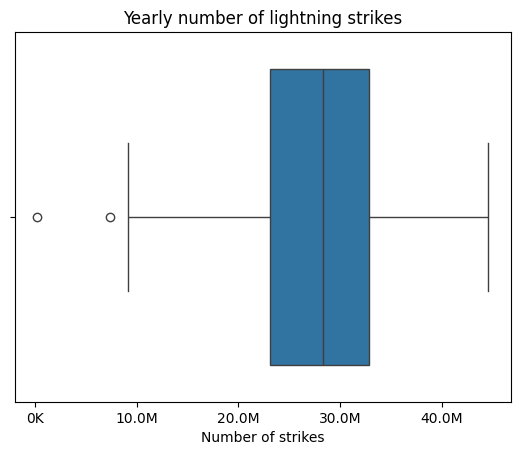

In [ ]:
# Create boxplot
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

The points to the left of the left whisker are outliers. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

One important point for every data professional: do not assume an outlier is erroneous unless there is an explanation or reason to do so.

Let's define our IQR, upper, and lower limit.

In [ ]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


Now we can use a Boolean mask to select only the rows of the dataframe where the number of strikes is less than the lower limit we calculated above. These rows are the outliers on the low end.

In [ ]:
# Isolate outliers on low end
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


Let's get a visual of all of the data points with the outlier values colored red.

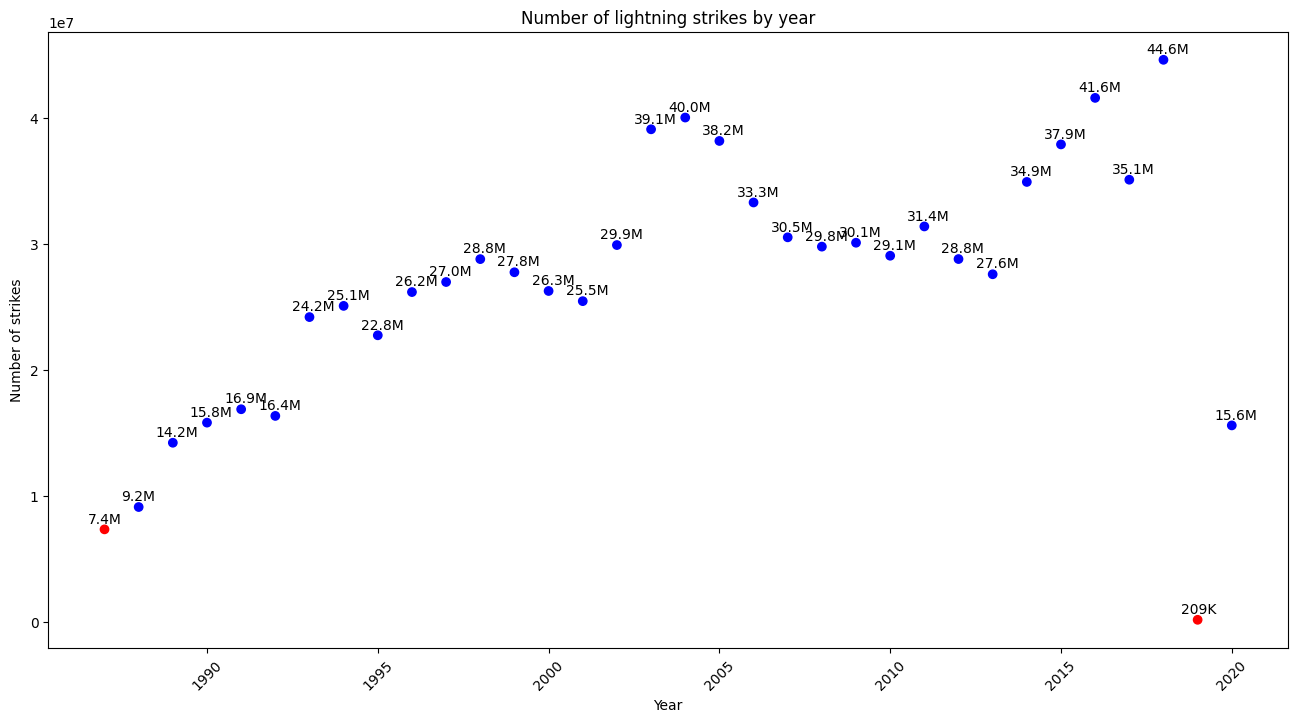

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

## Investigating the outliers 2019 and 1987

Let's examine the two outlier years a bit more closely. In the section above, we used a preprocessed dataset that didn't include a lot of the information that we're accustomed to having in this data. In order to further investigate the outlier years, we'll need more information, so we're going to import data from these years specifically.

### Import data for 2019

In [ ]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')

In [ ]:
df_2019.head()

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)


First, we'll convert the *date* column to datetime. This will enable us to extract two new columns: *month* and **month_txt**. Then, we'll sort the data by *month* and **month_txt**, sum it, and sort the values.

In [ ]:
# Convert `date` column to datetime
df_2019['date']= pd.to_datetime(df_2019['date'])

# Create 2 new columns
df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_2019_by_month = df_2019.groupby(['month','month_txt']).sum('number_of_strikes').sort_values('month', ascending=True).head(12).reset_index()
df_2019_by_month

,month,month_txt,number_of_strikes
0,12,Dec,209166


2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. We should probably exclude 2019 from the analysis (for most use cases).

### Import data for 1987

In [ ]:
# Read in 1987 data
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')

In [ ]:
# Convert `date` column to datetime
df_1987['date'] = pd.to_datetime(df_1987['date'])

# Create 2 new columns
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_1987_by_month = df_1987.groupby(['month','month_txt']).sum('number_of_strikes').sort_values('month', ascending=True).head(12).reset_index()
df_1987_by_month

,month,month_txt,number_of_strikes
0,1,Jan,23044
1,2,Feb,61020
2,3,Mar,117877
3,4,Apr,157890
4,5,May,700910
5,6,Jun,1064166
6,7,Jul,2077619
7,8,Aug,2001899
8,9,Sep,869833
9,10,Oct,105627


1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data.

Finally, let's re-run the mean and median after removing the outliers. Our final takeaway from our lesson on outliers is that outliers significantly affect the dataset's mean, but do not significantly affect the median.

To remove the outliers, we'll use a Boolean mask to create a new dataframe that contains only the rows in the original dataframe where the number of strikes >= the lower limit we calculated above.

In [ ]:
# Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

# Recalculate mean and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M


Both the mean and the median changed, but the mean much more so. It is clear that outlier values can affect the distributions of the data and the conclusions that can be drawn from them.

If you have successfully completed the material above, congratulations! You now understand discovering in Python and should be able to start using it on your own datasets.

# Label Encoding

## Objective
We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016–2018. The dataset includes three columns:

*date, number_of_strikes, center_point_geom*

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.

In [ ]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Read in the data
df = pd.read_csv('eda_label_encoding_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98652 entries, 0 to 98651
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               98652 non-null  object
 1   number_of_strikes  98652 non-null  int64 
 2   center_point_geom  98652 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


## Create a categorical variable strike_level
Begin by converting the date column to datetime. Then we'll create a new month column that contains the first three letters of each month.

In [ ]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)

In [ ]:
df.head()

,date,number_of_strikes,center_point_geom,month
0,2016-08-05,16,POINT(-101.5 24.7),Aug
1,2016-08-05,16,POINT(-85 34.3),Aug
2,2016-08-05,16,POINT(-89 41.4),Aug
3,2016-08-05,16,POINT(-89.8 30.7),Aug
4,2016-08-05,16,POINT(-86.2 37.9),Aug


Next, we'll encode the months as categorical information. This allows us to specifically designate them as categories that adhere to a specific order, which is helpful when we plot them later. We'll also create a new *year* column. Then we'll group the data by *year* and *month*, sum the remaining columns, and assign the results to a new dataframe.

In [ ]:
# Create categorical designations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Encode `month` column as categoricals
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Create `year` column by extracting the year info from the datetime object
df['year'] = df['date'].dt.strftime('%Y')

# Create a new df of month, year, total strikes
df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' or else the sum() function will throw an error

<ipython-input-63-73b3df55f2b3>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,year,month,number_of_strikes
0,2016,Jan,3708
1,2016,Feb,3480
2,2016,Mar,17659
3,2016,Apr,21354
4,2016,May,40168


Now we'll create a new column called **strike_level** that contains a categorical variable representing the lightning strikes for each month as *mild, scattered, heavy,*  or *severe*. The **pd.qcut** pandas function makes this easy. We just input the column to be categorized, the number of quantiles to sort the data into, and how we want to name each quantile.

In [ ]:
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels = ['mild','scattered','heavy','severe'])
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,3708,mild
1,2016,Feb,3480,mild
2,2016,Mar,17659,scattered
3,2016,Apr,21354,scattered
4,2016,May,40168,scattered


## Encode strike_level into numerical values

Now that we have a categorical **strike_level** column, we can extract a numerical code from it using **.cat.codes** and assign this number to a new column.

In [ ]:
# Create new column representing numerical value of strike level
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,3708,mild,0
1,2016,Feb,3480,mild,0
2,2016,Mar,17659,scattered,1
3,2016,Apr,21354,scattered,1
4,2016,May,40168,scattered,1


We can also create binary "dummy" variables from the **strike_level** column. This is a useful tool if we'd like to pass the categorical variable into a model. To do this, we could use the function **pd.get_dummies()**. Note that this is just to demonstrate the functionality of pd.**get_dummies()**. Simply calling the function as we do below will not convert the data unless we reassigned the result back to a dataframe.

pd.get_dummies(df['column']) 🠚 **df unchanged**

df = pd.get_dummies(df['column']) 🠚 **df changed**

In [ ]:
pd.get_dummies(df_by_month['strike_level'])

,mild,scattered,heavy,severe
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,True,False
8,False,True,False,False
9,True,False,False,False


We don't need to create dummy variables for our heatmap, so let's continue without converting the dataframe.

## Create a heatmap of number of strikes per month

We want our heatmap to have the months on the x-axis and the years on the y-axis, and the color gradient should represent the severity (mild, scattered, heavy, severe) of lightning for each month. A simple way of preparing the data for the heatmap is to pivot it so the rows are years, columns are months, and the values are the numeric code of the lightning severity.

We can do this with the **df.pivot()** method. It accepts arguments for **index**, **columns**, and **values**, which we'll specify as described.

In [ ]:
# Create new df that pivots the data
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,1,1,1,2,2,1,0,0,0
2018,2,3,2,2,3,3,3,3,3,2,1,0


At last we can plot the heatmap! We'll use seaborn's heatmap() function for this.

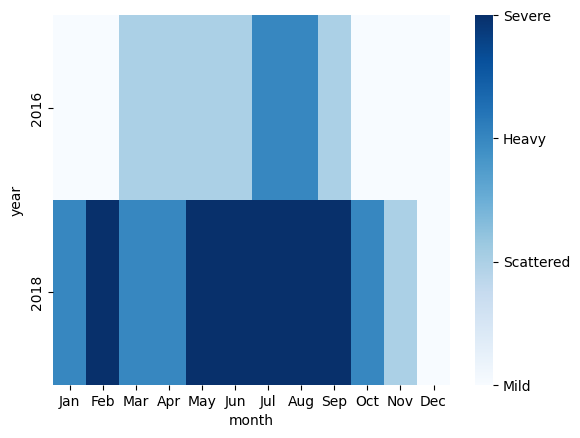

In [ ]:
ax = sns.heatmap(df_by_month_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months. A heatmap is an easily digestable way to understand a lot of data in a single graphic.

If you have successfully completed the material above, congratulations! You now understand how to perform label encoding in Python and should be able to start using these skills on your own datasets.

# Input Validation

## Objective
We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes five columns:

*date, number_of_strikes, center_point_geom, longitude, latitude*

The objective is to inspect the data and validate the quality of its contents. We will check for:

  - Null values
  - Missing dates
  - A plausible range of daily lightning strikes in a location
  - A geographical range that aligns with expectation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('eda_input_validation_joining_dataset1.csv')

In [ ]:
df.head()

,date,number_of_strikes,center_point_geom,longitude,latitude
0,2018-01-03,194,POINT(-75 27),-75.0,27.0
1,2018-01-03,41,POINT(-78.4 29),-78.4,29.0
2,2018-01-03,33,POINT(-73.9 27),-73.9,27.0
3,2018-01-03,38,POINT(-73.8 27),-73.8,27.0
4,2018-01-03,92,POINT(-79 28),-79.0,28.0


In [ ]:
# Display the data types of the columns
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


The date column is currently a string. Let's parse it into a datetime column.

In [ ]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

Now we'll do some data validation. We begin by counting the number of missing values in each column.

In [ ]:
df.isnull().sum()

,0
date,0
number_of_strikes,0
center_point_geom,0
longitude,0
latitude,0


Check ranges for all variables.

In [ ]:
df.describe(include = 'all')

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,NaN,NaN,170855,NaN,NaN
top,NaN,NaN,POINT(-81.5 22.5),NaN,NaN
freq,NaN,NaN,108,NaN,NaN
mean,2018-07-13 03:32:02.018504960,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
min,2018-01-01 00:00:00,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,2018-06-04 00:00:00,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,2018-07-18 00:00:00,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,2018-08-24 00:00:00,1.200000e+01,NaN,-8.130000e+01,3.970000e+01
max,2018-12-31 00:00:00,2.211000e+03,NaN,-4.320000e+01,5.170000e+01


Notice that the number of unique dates in the date column is 357. This means that eight days of 2018 are missing from the data, because 2018 had 365 days.

## Validate date column

We need a way to easily determine which dates are missing. We can do this by comparing all of the actual dates in 2018 to the dates we have in our date column. The function **pd.date_range()** will create a datetime index of all dates between a start and end date (inclusive) that we'll give as arguments. This is a very useful function that can be used for more than just days.

Once we have the datetime index object of all dates in 2018, we'll compare its contents to the dates we have in the date column. The **index.difference()** method is used on index objects. Its argument is an index or array that you want to compare with the one the method is being applied to. It returns the set difference of the two indices—the values that are in the original index but not in the one given in the argument.

In [ ]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

We knew that the data was missing eight dates, but now we know which specific dates they are.

## Validate number_of_strikes column
Let's make a boxplot to better understand the range of values in the data.

<Axes: ylabel='number_of_strikes'>

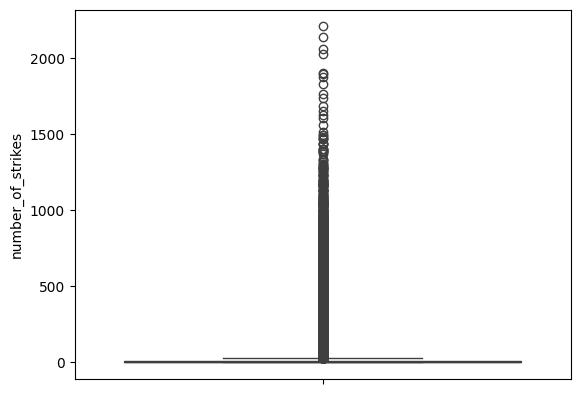

In [ ]:
sns.boxplot(y = df['number_of_strikes'])

This is not a very useful visualization because the box of the interquartile range is squished at the very bottom. This is because the upper outliers are taking up all the space.

Let's do it again, only this time we'll set **showfliers=False** so outliers are not included.

<Axes: ylabel='number_of_strikes'>

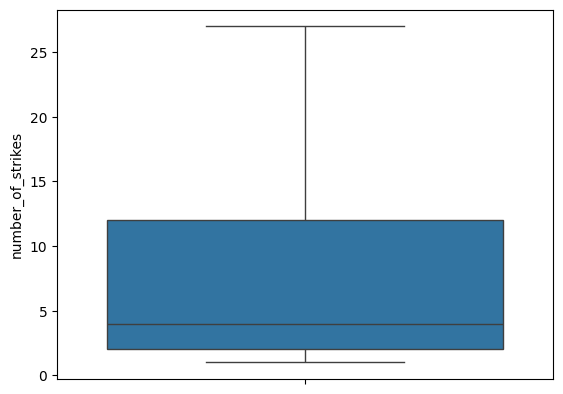

In [ ]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

Much better! The interquartile range is approximately 2–12 strikes. But we know from the previous boxplot that there are many outlier days that have hundreds or even thousands of strikes. This exercise just helped us make sure that most of the dates in our data had plausible values for number of strikes.

## Validate latitude and longitude columns
Finally, we'll create a scatterplot of all the geographical coordinates that had lightning strikes in 2018. We'll plot the points on a map to make sure the points in the data are relevant and not in unexpected locations. Because this can be a computationally intensive process, we'll prevent redundant computation by dropping rows that have the same values in their *latitude* and *longitude* columns. We can do this because the purpose here is to examine locations that had lightning strikes, but it doesn't matter how many strikes they had or when.

In [ ]:
# Create new df only of unique latitude and longitude combinations
df_points = df[['latitude', 'longitude']].drop_duplicates()
df_points.head()

,latitude,longitude
0,27.0,-75.0
1,29.0,-78.4
2,27.0,-73.9
3,27.0,-73.8
4,28.0,-79.0


In [ ]:
p = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
p.show()

The plot indicates that the lightning strikes occurred primarily in the United States, but there were also many strikes in southern Canada, Mexico, and the Caribbean. We can click and move the map, and also zoom in for better resolution of the strike points.

# Activity : Address missing data

## Step 1 : Imports

### Import libraries

In [ ]:
# Import libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load dataset

In [ ]:
df_companies = pd.read_csv('Unicorn_Companies.csv')

## Step 2 : Data exploration

### Display top rows

In [ ]:
# Display the first 10 rows of the data.

df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Statistical properties of the dataset

In [ ]:
# Get the shape of the dataset.

df_companies.shape

(1074, 10)

In [ ]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [ ]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


### Data Preprocessing

In [ ]:
# Create a new column `Year Joined`

df_companies['Year_Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year

<ipython-input-7-778283533e58>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_companies['Year_Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year


For each country, you want to calculate the sum of all valuations of companies from that country. However, in order to do this, you'll need to first prepare the data. Currently, the data in the **Valuation** column is a string that starts with a **$** and ends with a **B**. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype.

In [ ]:
# Define the `str_to_num()` function

def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

In [ ]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num)
df_companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


### Find missing values

In [ ]:
# Find the number of missing values in each column in this dataset.

df_companies.isna().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


### Review rows of missing values

In [ ]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


Note that 0, False, and NaN are considered False and anything else is considered True.

In [ ]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`

mask = mask.any(axis=1)
mask.head()

,0
0,False
1,False
2,False
3,False
4,False


In [ ]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

### YOUR CODE HERE ###
df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: What steps did you take to find missing data?**

  1. **DataFrame.isna()** will return a Boolean dataframe indicating every location that is **NaN** with **True**

  2. You can use **sum()** in conjunction with **isna()** to get the counts of **NaN** values in each column.

  3. You can use **any()** in conjunction with **isna()** to create a Boolean mask, which can be applied to the original dataframe to obtain just the rows with at least one **NaN** value.

## Step 3 : Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are **removing them** and **imputing other values** in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

### [01] : Remove

In [ ]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size
count_total

12888

### remove all rows containing missing values

In [ ]:
# Drop the rows containing missing values, determine number of remaining values

count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

### remove all columns containing missing values

In [ ]:
# Drop the columns containing missing values, determine number of remaining values

count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

In [ ]:
# Print the percentage of values removed by dropping rows.

### YOUR CODE HERE ###

row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

# Print the percentage of values removed by dropping columns.

### YOUR CODE HERE ###

col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


**Question: Which method was most effective? Why?**

The percentage removed was significantly higher for columns than it was for rows. Since both approaches result in a dataset with no missing values, the "most effective" method depends on how much data you have and what you want to do with it. It might be best to use the way that leaves the most data intact—in this case, dropping rows. Or, if you don't have many samples and don't want to lose any, but you don't need all your columns, then dropping columns might be best. With this data, it would probably be best to drop rows in the majority of cases.

### [02] : Imputation

Use the fillna() dataframe method to fill each missing value with the next non-NaN value in its column.

  - Note that if there is a NaN value in the last row, it will not backfill because there is no subsequent value in the column to refer to.

In [ ]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.fillna(method='backfill')

# 2. Show the rows that previously had missing values

df_companies_backfill.iloc[df_missing_rows.index, :]

<ipython-input-19-c68c860f49aa>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_companies_backfill = df_companies.fillna(method='backfill')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**

- No, the values seem to be added without consideration of the country those cities are located in.


Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation
Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the Hardware Industry
Your investor is interested in identifying unicorn companies in the **Hardware** industry in the following cities: **Beijing, San Francisco, and London**. They are also interested in companies in the **Artificial intelligenc**e industry in **London**.

In [ ]:
# 1. Create a Boolean mask using conditional logic


cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,11/10/21,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


**Question: How many companies meet the criteria given by the investor?**

Eight companies meet the stated criteria.

### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called national_valuations

In [ ]:
# Group the data by`Country/Region`

national_valuations = df_companies.groupby(['Country/Region'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()

# Print the top 15 values of the DataFrame.

national_valuations.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


### Filter out top 4 outlying countries
Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from national_valuations and reassign the results to a variable called national_valuations_no_big4.

In [ ]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### BONUS CONTENT: Alternative approach (optional)
You can also use isin() to create a Boolean mask to filter out specific values of the Country/Region column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach.

In [ ]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

### YOUR CODE HERE ###

mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### Create barplot for top 20 non-big-4 countries

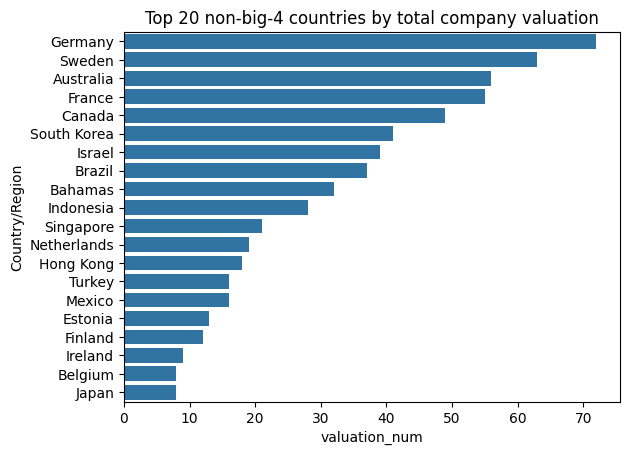

In [ ]:
# Create a barplot to compare the top 20 non-big-4 countries with highest company valuations

### YOUR CODE HERE ###

sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

### Plot maps
Your investor has also asked for a global valuation map of all countries except United States, China, India, and United Kingdom (a.k.a. "big-four countries").

You have learned about using scatter_geo() from the plotly.express library to create plot data on a map. Create a scatter_geo() plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [ ]:
# Plot the sum of valuations per country.

data = national_valuations_no_big4

px.scatter_geo(data,
               locations='Country/Region',
               size='valuation_num',
               locationmode='country names',
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')

**Question: How is the valuation sum per country visualized in the plot?**

  - Valuation sum per country is visualized by the size of circles around the map.

**Question: Does any region stand out as having a lot of activity?**

  - Europe has a lot of unicorn companies in a concentrated area.

# Activity : Validate and Clean your data

**Introduction**

In this activity, you will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks.


## Step 1 : Imports

In [ ]:
# Import libraries and packages.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [ ]:
companies = pd.read_csv('Modified_Unicorn_Companies.csv')

# Display the first five rows.

### YOUR CODE HERE ###
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning
Begin by displaying the data types of the columns in companies.

In [ ]:
# Display the data types of the columns.

companies.dtypes

### Modify the data types

Notice that the data type of the Date Joined column is an object—in this case, a string. Convert this column to datetime to make it more usable.

In [ ]:
# Apply necessary datatype conversions.

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

### Create a new column

Add a column called Years To Unicorn, which is the number of years between when the company was founded and when it became a unicorn.

In [ ]:
# Create the column Years To Unicorn.

companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

### Input validation
The data has some issues with bad data, duplicate rows, and inconsistent Industry labels.
Follow the steps below to identify and correct each of these issues.

**Correcting bad data**

Get descriptive statistics for the Years To Unicorn column.

In [ ]:
companies['Years To Unicorn'].describe()

,Years To Unicorn
count,1074.000000
mean,7.013035
std,5.331842
min,-3.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,98.000000


In [ ]:
# Isolate any rows where `Years To Unicorn` is negative

companies[companies['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2020,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


An internet search reveals that InVision was founded in 2011. Replace the value at Year Founded with 2011 for InVision's row.

In [ ]:
# Replace InVision's `Year Founded` value with 2011

companies.loc[companies['Company']=='InVision', 'Year Founded'] = 2011

# Verify the change was made properly

companies[companies['Company']=='InVision']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


In [ ]:
# Recalculate all values in the `Years To Unicorn` column

companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

# Verify that there are no more negative values in the column

companies['Years To Unicorn'].describe()

,Years To Unicorn
count,1074.000000
mean,7.021415
std,5.323155
min,0.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,98.000000


### Issues with Industry labels

The company provided you with the following list of industry labels to identify in the data for **Industry**.

**Note**: Any labels in the **Industry** column that are not in **industry_list** are misspellings.

In [ ]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

**Set A** – **Set B** will result in all the elements that are in **Set A** but not in **Set B**.

Convert **industry_list** to a set and subtract it from the set of the values in the Industry series.

In [ ]:
# Check which values are in `Industry` but not in `industry_list`

set(companies['Industry']) - set(industry_list)

{'Artificial Intelligence', 'Data management and analytics', 'FinTech'}

### Handling misspelling with dictionary
1. Create a dictionary called **replacement_dict** whose keys are the incorrect spellings in the Industry series and whose values are the correct spelling, as indicated in **industry_list**.

2. Call the **replace()** method on the Industry series and pass to it **replacement_dict** as its argument. Reassign the result back to the Industry column.

3. Verify that there are no longer any elements in Industry that are not in **industry_list**.

In [ ]:
# 1. Create `replacement_dict`

replacement_dict = {'Artificial Intelligence': 'Artificial intelligence',
                   'Data management and analytics': 'Data management & analytics',
                   'FinTech': 'Fintech'
                   }

# 2. Replace the incorrect values in the `Industry` column

companies['Industry'] = companies['Industry'].replace(replacement_dict)

# 3. Verify that there are no longer any elements in `Industry` that are not in `industry_list`

set(companies['Industry']) - set(industry_list)

set()

### Handling duplicate rows

The business mentioned that no company should appear in the data more than once.

Verify that this is indeed the case, and if not, clean the data so each company appears only once.

Begin by checking which, if any, companies are duplicated. Filter the data to return all occurrences of those duplicated companies.

In [ ]:
# Isolate rows of all companies that have duplicates

companies[companies.duplicated(subset=['Company'], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


In [ ]:
# Drop rows of duplicate companies after their first occurrence

companies = companies.drop_duplicates(subset=['Company'], keep='first')

**Question: Why is it important to perform input validation?**

Input validation is an essential practice for ensuring data is complete, error-free, and high quality. A low-quality dataset may lend itself to an analysis that is incorrect or misleading.

**Question: What steps did you take to perform input validation for this dataset?**

The input validation steps for this lab included:
Fixing incorrect values
Correcting inconsistencies in the data
Removing duplicate data

## Convert numerical data to categorical data

Sometimes, you'll want to simplify a numeric column by converting it to a categorical column. To do this, one common approach is to break the range of possible values into a defined number of equally sized bins and assign each bin a name. In the next step, you'll practice this process.

### Create a High Valuation column

The data in the Valuation column represents how much money (in billions, USD) each company is valued at. Use the Valuation column to create a new column called High Valuation. For each company, the value in this column should be low if the company is in the bottom 50% of company valuations and high if the company is in the top 50%.

In [ ]:
# Create new `High Valuation` column

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
companies['High Valuation'] = pd.qcut(companies['Valuation'], 2, labels = ['low', 'high'])

## Convert categorical data to numerical data
Three common methods for changing categorical data to numerical are:

  - **Label encoding**: order matters (*ordinal numeric labels*)

  - **Label encoding**: order doesn't matter (*nominal numeric labels*)

  - **Dummy encoding**: order doesn't matter (creation of binary columns for each possible category contained in the variable)

The decision on which method to use depends on the context and must be made on a case-to-case basis. However, a distinction is typically made between categorical variables with equal weight given to all possible categories vs. variables with a hierarchical structure of importance to their possible categories.

For example, a variable called *subject* might have possible values of *history, mathematics, literature.* In this case, each subject might be **nominal** —given the same level of importance. However, you might have another variable called *class*, whose possible values are *freshman, sophomore, junior, senior*. In this case, the class variable is **ordinal**—its values have an ordered, hierarchical structure of importance.

**Machine learning models typically need all data to be numeric, and they generally use ordinal label encoding (method 1) and dummy encoding (method 3).**

In the next steps, you'll convert the following variables: **Continent, Country/Region**, and **Industry**, each using a different approach.

### Convert Continent to numeric (Ordinal label encoding)

For the purposes of this exercise, suppose that the investment group has specified that they want to give more weight to continents with fewer unicorn companies because they believe this could indicate unrealized market potential.

**Question: Which type of variable would this make the Continent variable in terms of how it would be converted to a numeric data type?**

This would make Continent an ordinal variable, since more importance is placed on continents with fewer unicorn companies. There is a hierarchy of importance.

In [ ]:
# Rank the continents by number of unicorn companies

companies['Continent'].value_counts()

,count
Continent,
North America,586
Asia,310
Europe,143
South America,21
Oceania,8
Africa,3


In [ ]:
# Create numeric `Continent Number` column

continent_dict = {'North America': 1,
                  'Asia': 2,
                  'Europe': 3,
                  'South America': 4,
                  'Oceania': 5,
                  'Africa': 6
                 }
companies['Continent Number'] = companies['Continent'].replace(continent_dict)
companies.head()

<ipython-input-18-6721d37d45af>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  companies['Continent Number'] = companies['Continent'].replace(continent_dict)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Number
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,high,2
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,high,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,high,2
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,high,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,high,3


### Convert Country/Region to numeric (Nominal label encoding)

Now, suppose that within a given continent, each company's **Country/Region** is given equal importance. For analytical purposes, you want to convert the values in this column to numeric without creating a large number of dummy columns. Use label encoding of this nominal categorical variable to create a new column called **Country/Region Numeric**, wherein each unique **Country/Region** is assigned its own number.

In [ ]:
# Create `Country/Region Numeric` column

# Create numeric categories for Country/Region
companies['Country/Region Numeric'] = companies['Country/Region'].astype('category').cat.codes

### Convert Industry to numeric (Dummy encoding)
Finally, create dummy variables for the values in the Industry column.

- When you call **pd.get_dummies()** on a specified series, it will return a dataframe consisting of each possible category contained in the series represented as its own binary column. You'll then have to combine this new dataframe of binary columns with the existing **companies** dataframe.

- You can use **pd.concat([col_a, col_b])** to combine the two dataframes. Remember to specify the correct axis of concatenation and to reassign the result back to the **companies** dataframe.

In [ ]:
# Convert `Industry` to numeric data

# Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies['Industry'])

# Combine `companies` DataFrame with new dummy Industry columns
companies = pd.concat([companies, industry_encoded], axis=1)

**Question: Which categorical encoding approach did you use for each variable? Why?**

  - *Continent* - **Ordinal label encoding** was used because there was a hierarchical order to the categories.

  - *Country/Region* - **Nominal label encoding** was used because there was not a hierarchical order the categories.

  - *Industry* - **Dummy encoding** was used because there were not many different categories represented and they were all equally important.

**Question: How does label encoding change the data?**

- Label encoding changes the data by assigning each category a unique number instead of a qualitative value.

**Question: What are the benefits of label encoding?**

- Label encoding is useful in machine learning models, because many types of machine learning require all variables to be of a numeric data type.

**Question: What are the disadvantages of label encoding?**

- Label encoding may make it more difficult to directly interpet what a column value represents. Further, it may introduce unintended relationships between the categorical data in a dataset.